# Computer Lab 1 - ENGN4528 - 2021

**Name:** Thao Pham  
**Student ID:** u7205329  
**Date:** 28/03/2021

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


# Task 1 - Python Warm Up

In [2]:
a = np.array([[2,3,4], [5,2,200]])
a

array([[  2,   3,   4],
       [  5,   2, 200]])

In [3]:
# Return the second column of matrix a 
b = a[:, 1]
b

array([3, 2])

In [4]:
# Create a row vector of 400 random numbers taken from a
# normally distributed sample with mean = 3 and stdev = 1

f = np.random.randn(400,1) + 3
f[:5]

array([[3.91436672],
       [4.62139342],
       [3.02777961],
       [3.01805467],
       [1.06637146]])

In [5]:
# Take all the numbers in vector c that is greater than 0 and
# multiply them by 3 

g = f[f>0] *3
g[:5]

array([11.74310015, 13.86418026,  9.08333884,  9.05416402,  3.19911439])

In [6]:
# Create a vector of length 100 filled with 0.45. 

x = np.zeros(100) + 0.45
x[:10]

array([0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45])

In [7]:
# Create a vector y of length the same as that of vector x
# filled with 0.5
y = 0.5 * np.ones([1, len(x)])
y[:,:10]

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [8]:
z = x+y
z[:,:10]

array([[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]])

In [9]:
a = np.linspace(1, 499, 250, dtype = int)
a[:10]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [10]:
b=a[::-2]
b[:10]

array([499, 495, 491, 487, 483, 479, 475, 471, 467, 463])

In [11]:
b[b>50] = 0
b[-15:]

array([ 0,  0,  0, 47, 43, 39, 35, 31, 27, 23, 19, 15, 11,  7,  3])

# Task 2

## Question 1

Load a grayscale image, and map the image to its negative image, in which the lightest values appear dark and vice versa. Display it side by side with its original version.

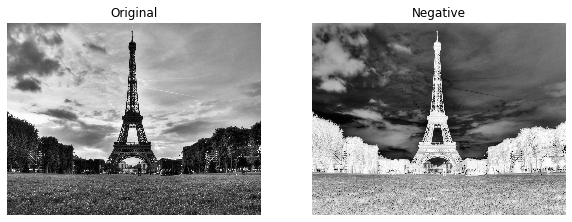

In [12]:
img = cv2.imread('ref-photos/Atowergray.jpg', 0)
negative_img = 255 - img

fig, axs = plt.subplots(1,2, sharey = True, figsize = (10,15))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title('Original')
axs[1].imshow(negative_img, cmap = 'gray')
axs[1].set_title('Negative')

for ax in axs:
    ax.axis('off')
plt.show()

## Question 2

Flip the image horizontally (i.e, map pixels from right to left changed from left to right).

In [13]:
height,width = img.shape

flipped_img = np.zeros((height, width))

for i in range(0, height):
    for j in range(0, width):
        flipped_img[i, width-j-1] = img[i,j]
        
flipped_img = flipped_img.astype(np.uint8)

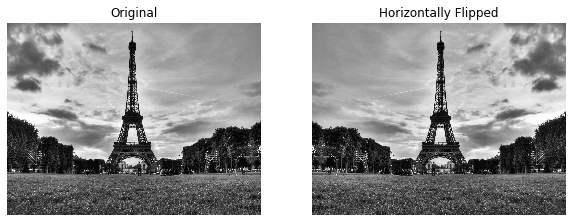

In [14]:
fig, axs = plt.subplots(1,2, figsize = (10,15))
#fig.suptitle('Negative image')
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(flipped_img, cmap = 'gray')
axs[1].set_title('Horizontally Flipped')
axs[1].axis('off')
plt.show()

## Question 3 

Load a colour image, swap the red and green colour channels of the input.

In [15]:
# Read in the colour image and covert to RGB since OpenCV reads in 
# colour image under the BGR colour space

colour_im = cv2.imread('ref-photos/image3.jpg', 1)
colour_im = cv2.cvtColor(colour_im, cv2.COLOR_BGR2RGB)

height,width,channels = colour_im.shape
new_colour_img = np.zeros([height, width, channels], dtype = np.uint8)

# Accessing the colour channels
R,G,B = cv2.split(colour_im)

# Swapping channels
new_colour_img[:,:,0] = G
new_colour_img[:,:,1] = R
new_colour_img[:,:,2] = B

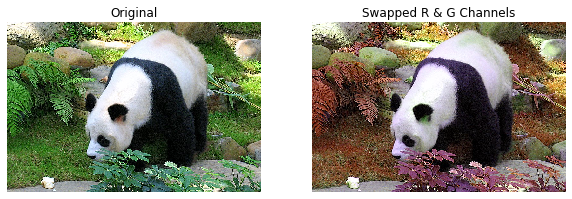

In [16]:
fig, axs = plt.subplots(1,2, figsize = (10,15))
axs[0].imshow(colour_im)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(new_colour_img)
axs[1].set_title('Swapped R & G Channels')
axs[1].axis('off')
plt.show()

## Question 4

Average the input image with its horizontally flipped image (use typecasting).

In [17]:
# Typecasting the two images to be average
img_double = img.astype(np.double)
flipped_double = flipped_img.astype(np.double)

# Averaging
weighted = 0.5*img_double + 0.5*flipped_double

# Clipping the averaged image so that it has a maximum value of 255
weighted[weighted > 255] = 255

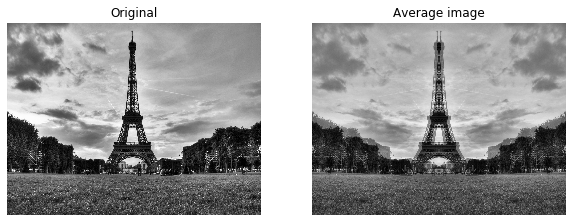

In [18]:
fig, axs = plt.subplots(1,2, figsize = (10,15))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(weighted, cmap = 'gray')
axs[1].set_title('Average image')
axs[1].axis('off')
plt.show()

## Question 5 

Add different random values between [0,127] to every pixel in the grayscale image, then clip the new image to have a minimum value of 0 and a maximum value of 255.

In [19]:
# Generating a random matrix

height,width = img.shape
random_mat = np.random.randint(0, 127, (height, width))

add = img.astype(np.double) + random_mat

# Clipping
add[add>255] = 255

# Typecasting the clipped image back to np.uint8
add = add.astype(np.uint8)

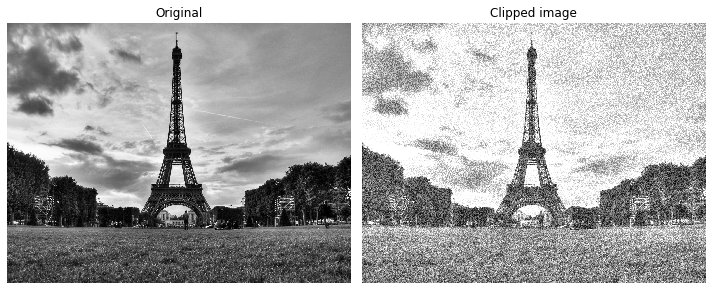

In [20]:
fig, axs = plt.subplots(1,2, figsize = (10,15))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(add, cmap = 'gray')
axs[1].set_title('Clipped image')
axs[1].axis('off')
plt.tight_layout()
plt.show()

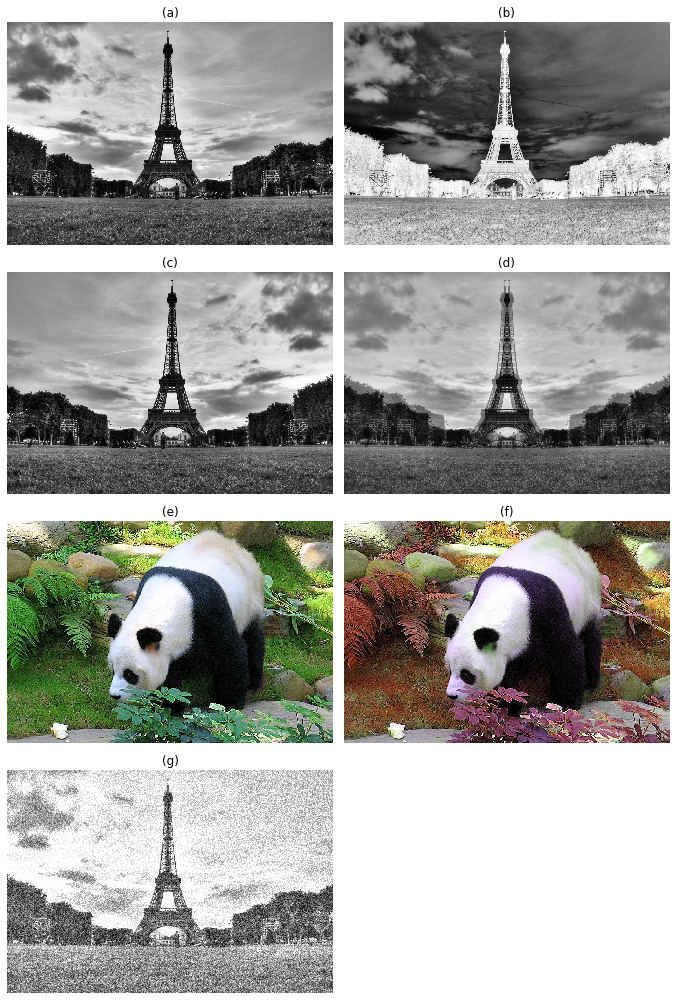

In [21]:
# Setting up the figure for lab report

fig, axs = plt.subplots(4, 2, figsize = (9.5, 14))
axs[0][0].imshow(img, cmap = 'gray')

axs[0][1].imshow(negative_img, cmap = 'gray')

axs[1][0].imshow(flipped_img, cmap = 'gray')

axs[1][1].imshow(weighted, cmap = 'gray')

axs[2][0].imshow(colour_im)

axs[2][1].imshow(new_colour_img)

axs[3][0].imshow(add, cmap = 'gray')

title = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
    
n = 0
for i in range(4):
    for j in range(2):
        
        axs[i][j].axis('off')
        axs[i][j].set_aspect('auto')
        if i == 3 and j == 1:
            pass
        else:
            axs[i][j].set_title('({})'.format(title[n]))
        n += 1
        
plt.tight_layout()
plt.savefig('results/Task2.png')

# Task 3 - Basic Image I/O

### Question a

Read this image from its JPG file, and resize the image to 384 x 256 in columns x rows

In [22]:
image1 = cv2.imread('ref-photos/image1.jpg', 1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1_resized = cv2.resize(image1, (384, 256)) #width, height

# Check resized image 
image1_resized.shape 

(256, 384, 3)

### Question b 

Convert the colour image into three grayscale channels, i.e., R,G,B images, and display each of the three channel grayscale images separately.

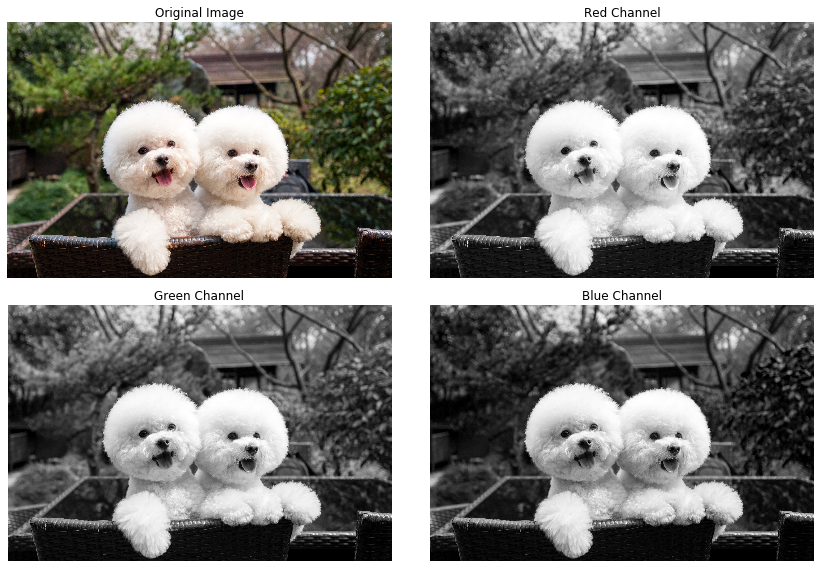

In [23]:
# Display image and its colour channels

R, G, B = cv2.split(image1_resized)

fig,axs = plt.subplots(2,2,figsize=(12,8))
axs[0][0].imshow(image1)
axs[0][0].set_title('Original Image')

axs[0][1].imshow(R, cmap = 'gray')
axs[0][1].set_title('Red Channel')

axs[1][0].imshow(G, cmap = 'gray')
axs[1][0].set_title('Green Channel')

axs[1][1].imshow(B, cmap = 'gray')
axs[1][1].set_title('Blue Channel')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig('results/Task-3b-Channels.png')
plt.show()

### Question c
Compute the histograms for each of the grayscale images, and display the 3 histograms 

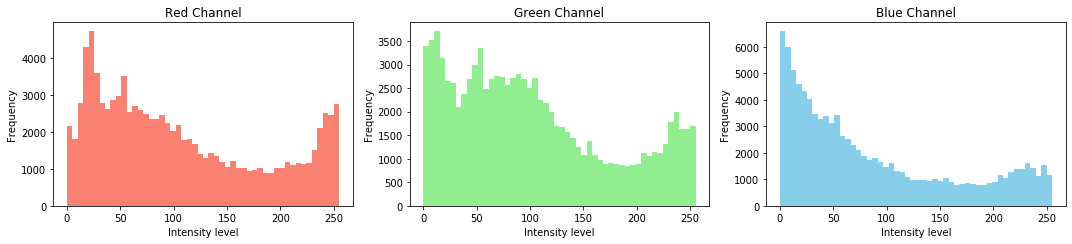

In [24]:
fig,axs = plt.subplots(1, 3, figsize = (15, 3.5))
axs[0].hist(R.ravel(), bins = 50, color = 'salmon')
axs[0].set_title('Red Channel')

axs[1].hist(G.ravel(), bins = 50, color = 'lightgreen')
axs[1].set_title('Green Channel')

axs[2].hist(B.ravel(), bins = 50, color = 'skyblue')
axs[2].set_title('Blue Channel')

for each in axs:
    each.set_ylabel('Frequency')
    each.set_xlabel('Intensity level')

#plt.xlabel('Intensity value')
plt.tight_layout()
plt.savefig('results/Task3c.png')
plt.show()

### Question d. 
Apply histogram equalisation to the resized image and its three grayscale channels, and then display the 4 histogram equalization image

In [25]:
# Perform histogram equalisation on the colour channels

R_resized, G_resized, B_resized = cv2.split(image1_resized)
red = cv2.equalizeHist(R_resized)
green = cv2.equalizeHist(G_resized)
blue = cv2.equalizeHist(B_resized)

In [26]:
# Combine the three to reconstruct the colour image

height, width, channels = image1_resized.shape

combined = np.zeros((height, width, channels), dtype = np.uint8)
combined[:,:,0] = red
combined[:,:,1] = green
combined[:,:,2] = blue

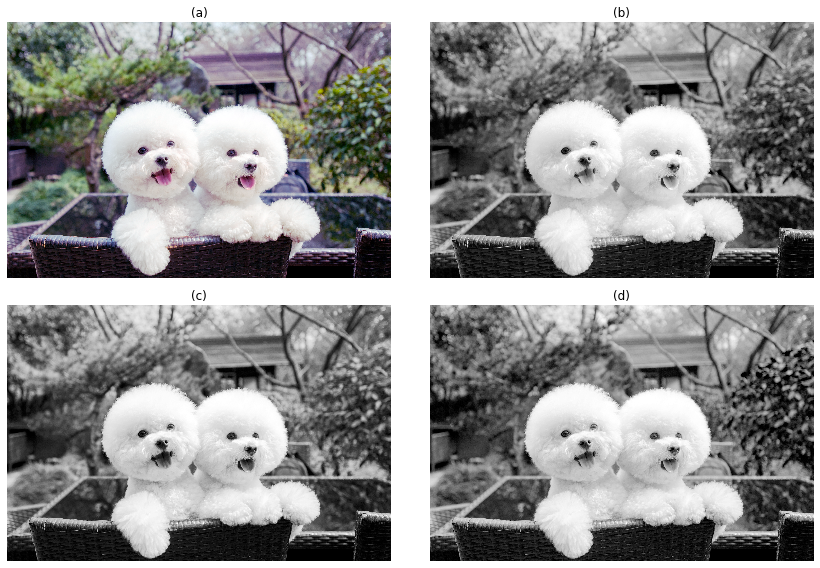

In [27]:
fig, axs = plt.subplots(2,2, figsize = (12,8))
axs[0][0].imshow(combined)
axs[0][0].set_title('(a)')

axs[0][1].imshow(red, cmap = 'gray')
axs[0][1].set_title('(b)')

axs[1][0].imshow(green, cmap = 'gray')
axs[1][0].set_title('(c)')

axs[1][1].imshow(blue, cmap = 'gray')
axs[1][1].set_title('(d)')

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.savefig('results/Task3d-Images.png')
plt.show()

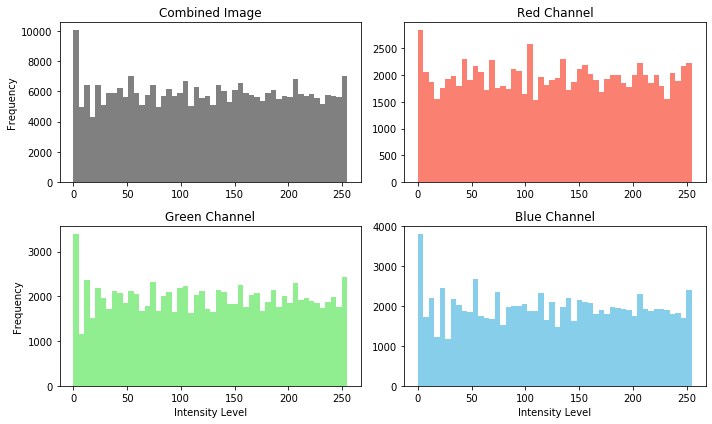

In [28]:
# Histograms after equalisation

fig, axs = plt.subplots(2, 2, figsize = (10,6))

axs[0][0].hist(combined.ravel(), bins = 50, color = 'gray')
axs[0][0].set_title('Combined Image')
axs[1][0].set_xlabel('Intensity Level')

axs[0][1].hist(red.ravel(), bins = 50, color = 'salmon')
axs[0][1].set_title('Red Channel')
axs[0][0].set_ylabel('Frequency')

axs[1][0].hist(green.ravel(), bins = 50, color = 'lightgreen')
axs[1][0].set_title('Green Channel')

axs[1][1].hist(blue.ravel(), bins = 50, color = 'skyblue')
axs[1][1].set_title('Blue Channel')
axs[1][0].set_ylabel('Frequency')
axs[1][1].set_xlabel('Intensity Level')

plt.tight_layout()
plt.savefig('results/Task3d-Histograms.png')
plt.show()

## Task 4

### Question 1 
Based on the formulation of RGB-to-YUV conversion, write your own function `cvRGB2YUV()` that converts the RGB image to YUV colour space

In [29]:
M = np.array([[0.299, 0.587, 0.114],
              [-0.168736, -0.331264, 0.5],
              [0.5, -0.418688, -0.081312]])

def cvRGB2YUV(imageRGB):
    h,w,c = imageRGB.shape
    imageYUV = np.zeros((h,w,c), dtype = np.double)
    
    for i in range(h):
        for j in range(w):
            R,G,B = imageRGB[i,j,:]
            Y, Cb, Cr = M@np.array([R,G,B])

            imageYUV[i,j,:] = [Y,Cb+128,Cr+128]
    return imageYUV.astype(np.uint8)

Read in Fig.2(a) and convert it with your function, and then display the Y, U, V channels in your report 

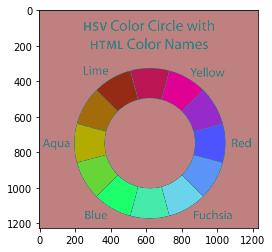

In [30]:
fig2a = cv2.imread('ref-photos/Fig2a.png',1)
fig2a = cv2.cvtColor(fig2a, cv2.COLOR_BGR2RGB)
fig2a_yuv = cvRGB2YUV(fig2a)

plt.imshow(fig2a_yuv)
plt.show()

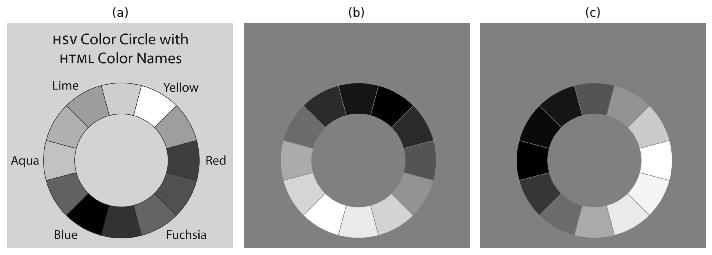

In [31]:
# Display the YUV channels in grayscale

Y,U,V = cv2.split(fig2a_yuv)

fig, axs = plt.subplots(1,3, figsize = (10, 4))
axs[0].imshow(Y, cmap = 'gray')
axs[0].set_title('(a)')
axs[1].imshow(U, cmap = 'gray')
axs[1].set_title('(b)')

axs[2].imshow(V, cmap = 'gray')
axs[2].set_title('(c)')

for ax in axs:
    ax.axis('off')
    
plt.tight_layout()
plt.savefig('results/Task4-1-ColourWheels.png')

plt.show()

b. Compute the average Y values of five colour regions in Fig. 2(b) with your function and the Matlab’s inbuilt function rgb2yuv(). Print both of them under the corresponding regions (0.1 marks for each value, 0.5 marks in total). You also need to explain how to distinguish and divide the five regions, and how to calculate the average Y value

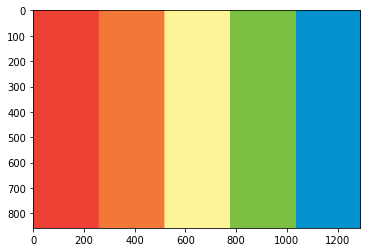

In [32]:
fig2b = cv2.imread('ref-photos/Fig2b.png', 1)
fig2b = cv2.cvtColor(fig2b, cv2.COLOR_BGR2RGB)

plt.imshow(fig2b)
plt.show()

In [33]:
# Convert fig2b to YUV using my function
Xmine = cvRGB2YUV(fig2b)

# Reshape the input before feeding into clustering algo
X_mine = []
height, width, channels = fig2b.shape

for i in range(height):
    for j in range(width):
        X_mine.append(Xmine[i,j,:])

X_mine = np.array(X_mine)     

# Calculate the average Y values using my function 
kmeans_mine = KMeans(n_clusters = 5, random_state = 0).fit(X_mine)
main_cols_mine = kmeans_mine.cluster_centers_

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


In [34]:
# Convert fig2b to YUV using python in-built function
fig2byuv = cv2.cvtColor(fig2b, cv2.COLOR_RGB2YUV)

X_ = []

for i in range(height):
    for j in range(width):
        X_.append(fig2byuv[i,j,:])
        
X_ = np.array(X_)
        
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(X_)
main_cols = kmeans.cluster_centers_   

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: h

/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/thaopham/me/anaconda3/lib/pyt

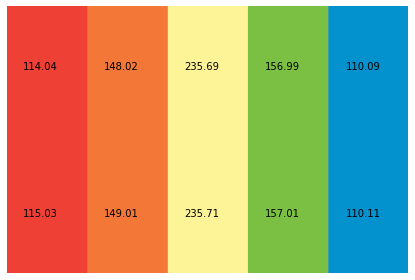

In [35]:
# Traverse through the width of fig2b (converted in YUV), 

y = 200

plt.imshow(fig2b)
x = 50
for i in range(5):
    # Predict the label of the current pixel using the classifiers
    # created above
    label = kmeans_mine.predict(Xmine[y,x,:].reshape(1,-1))
    label2 = kmeans.predict(fig2byuv[y,x,:].reshape(1,-1))
    
    # Get the cluster representative of said cluster
    Yval = np.round(main_cols_mine[label,0],2)[0]
    Yval2 = np.round(main_cols[label2,0],2)[0]
    
    # Print on image
    plt.text(x, y, Yval)
    plt.text(x, y+475, Yval2)
    x += 260
plt.axis('off')
plt.tight_layout()
plt.savefig('results/Task4-2AverageYs.png')
plt.show()

# Task 3 - Image Denoising

1. Read in image2.jpg. Crop a square image region corresponding to the central part of the image, resize it to 512×512, and save this square region to a new grayscale image. Please display the two images. Make sure the pixel value range of this new image is within [0, 255]. 

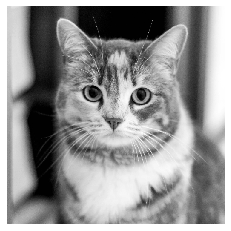

In [36]:
img2 = cv2.imread('ref-photos/image2.jpg', 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Crop the central region
img_cropped = img2[:,891:4454,:]
img2_resized = cv2.resize(img_cropped, (512, 512)) #height, width

# Turn into grayscale
img2yuv = cv2.cvtColor(img2_resized, cv2.COLOR_RGB2YUV)
Y,U,V = cv2.split(img2yuv)
img2_grayscale = Y

# Save
plt.imshow(img2_grayscale, cmap = 'gray')
plt.axis('off')
plt.savefig('results/Task3-grayscale.png')

Add Gaussian noise to this new 512x512 image (Review how you generate random number in Task-1). Use Gaussian noise with zero mean, and standard deviation of 15.

Display the two histograms side by side, one before adding the noise and one after adding the noise 

In [37]:
def add_noise(input_image):
    h, w = input_image.shape
    noise = (15)*np.random.randn(h, w)
    
    img = input_image.astype(np.double)
    
    noisy_img = img + noise
    noisy_img[noisy_img>255] = 255
    noisy_img[noisy_img<0] = 0
    
    return noisy_img.astype(np.uint8)

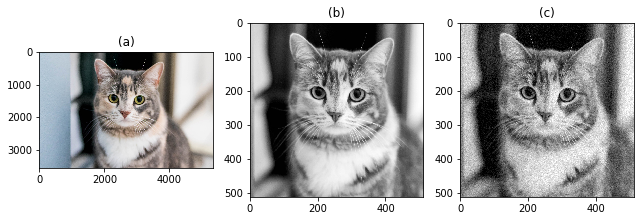

In [38]:
# Displaying original image, grayscale cropped, and added noise

img2_noisy = add_noise(img2_grayscale)

fig, axs = plt.subplots(1,3, figsize=(9,3))
axs[0].imshow(img2)
axs[0].set_title('(a)')
axs[1].imshow(img2_grayscale, cmap = 'gray')
axs[1].set_title('(b)')
axs[2].imshow(img2_noisy, cmap = 'gray')
axs[2].set_title('(c)')
plt.tight_layout()
plt.savefig('results/Task5-1.png')
plt.show()

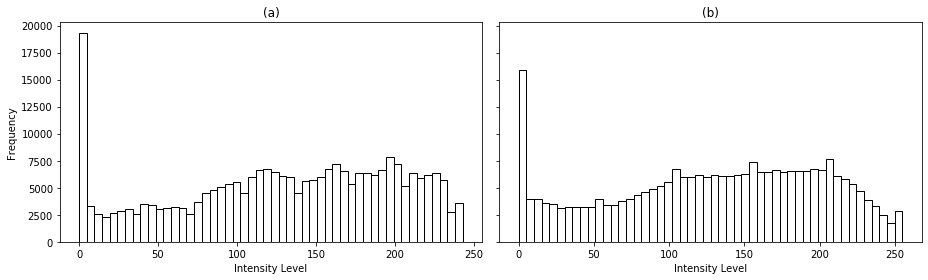

In [39]:
# The histogram of images before and after adding noise

fig, axs = plt.subplots(1,2, figsize = (13, 4), sharey = True)
axs[0].hist(img2_grayscale.ravel(), bins = 50, fill =False)
axs[0].set_title('(a)')
axs[0].set_xlabel('Intensity Level')
axs[1].hist(img2_noisy.ravel(), bins = 50, fill = False)
axs[1].set_title('(b)')
axs[1].set_xlabel('Intensity Level')

for ax in axs.flat:
    ax.set(ylabel='Frequency')
    ax.label_outer()
plt.tight_layout()
plt.savefig('results/Task5-1Histograms.jpg')
plt.show()

### Implement your own Matlab/python function that performs a 5x5 Gaussian filtering (1.5 marks). 

In [40]:
def gauss_kernel(size, sigma):
    half = size//2
    x = np.linspace(-half, half, size)
    y = np.linspace(-half, half, size)
    x, y = np.meshgrid(x,y)
    #sigma = 1

    normalise_term = 1/(2*np.pi*(sigma**2))
    h = normalise_term * np.exp(-(x**2 + y**2)/(2*(sigma**2)))
    return h

In [41]:
def my_gauss_filter(noisy_image, kernel):
    height, width = noisy_image.shape
    kernel_size = kernel.shape[0]
    
    half = kernel_size//2
    
    output_image = np.zeros((height, width), dtype = np.double)
    
    for i in range(height):
        for j in range(width):
            pixel = 0
            for k in range(0, kernel_size):
                for l in range(0, kernel_size):
                    try:
                        pixel += kernel[k,l]*noisy_image[i-half+k, j-half+l]
                    except IndexError: 
                    # This is to deal with border cases, when an IndexError
                    # is raised it means that we're trying to average with a pixel
                    # outside of the boundary, so we set the pixel value to 0
                        pixel += 0
            output_image[i,j] = pixel
        
    # Clipping output image
    output_image[output_image < 0] = 0
    output_image[output_image > 255] = 255
    
    return output_image.astype(np.uint8)

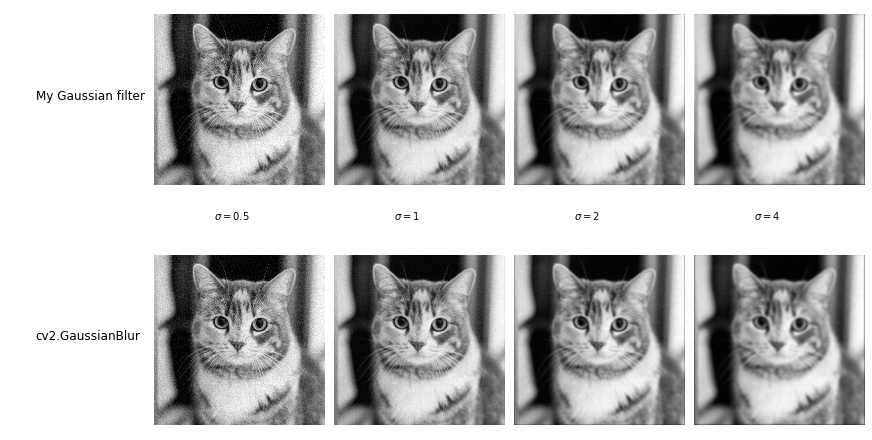

In [42]:
s = [0.5, 1, 2, 4]
diff = []
h,w = img2_grayscale.shape

fig, axs = plt.subplots(ncols = 5, nrows = 3, constrained_layout = True, 
                        gridspec_kw = {'width_ratios': [1,3,3,3,3], 'height_ratios': [5,1,5]}, 
                        figsize = (12,6))

axs[0][0].text(0.5, 0.5, 'My Gaussian filter', fontsize = 12)
axs[2][0].text(0.5, 0.5, 'cv2.GaussianBlur', fontsize = 12)

for i in range(len(s)):
    sigma = s[i]
    h = gauss_kernel(11, sigma)
    out_mine = my_gauss_filter(img2_noisy, h)
    axs[0][i+1].imshow(out_mine, cmap = 'gray')
    axs[1][i+1].text(0.35, 0.5, '$\sigma = {}$'.format(sigma))
    out_cv2 = cv2.GaussianBlur(img2_noisy, ksize = (11,11), sigmaX = sigma, borderType = cv2.BORDER_CONSTANT)
    difference = np.linalg.norm(out_cv2 - out_mine)**2/(512*512)
    diff.append(difference)
    axs[2][i+1].imshow(out_cv2, cmap = 'gray')
    
for ax in axs.flat:
    ax.axis('off')
    
plt.savefig('results/Task5-3.png')
plt.show()

In [43]:
# Difference between my Gaussian filter and cv2.GaussianBlur

np.sqrt(diff)

array([234.04777354,  21.45147312,  29.06544417,  50.30215006])

# Task-5 (cont.): Image Denoising via a Bilateral Filter

1. Using your Gaussian filter as a base, implement your own Matlab/Python function that performs a 5x5 Bilateral filtering to gray-scale image.

Firstly, we can simplify the bilateral weight function to 

$w = exp\Big\{-(c \frac{a}{2*\sigma_d^2}) - (\frac{b}{2*\sigma_r^2})\Big\}$

where c is the normalise term, a is the distance between two pixels, and b is the difference in intensities between them

we can then write $w = w_d w_r$ where $w_d =exp\Big\{c \frac{a}{2\sigma_d^2}\Big\}$ and $w_r = exp\Big\{\frac{b}{2\sigma_r^2}\Big\}$

the `gauss_term` below refers to $w_d$

In [44]:
def bilateral_weight_function(gauss_term, f_ij, f_kl, colour_sigma):

    pixel_value_diff = np.exp(-(np.abs(f_ij - f_kl))**2 / (2*colour_sigma**2))

    return gauss_term*pixel_value_diff

In [45]:
def my_bilateral_filter(noisy_image, my_gausskernel, colour_sigma):
    # Assume the noisy image is grayscale
    
    kernel_size = my_gausskernel.shape[0]
    height, width = noisy_image.shape 
    
    f = noisy_image.astype(np.double)
    
    output_image = np.zeros((height, width), dtype = np.double)

    half = kernel_size//2
    for i in range(half, height-half):
        for j in range(half, width-half):
            f_ij = f[i,j]
            numerator = 0
            denominator = 0
            for k in range(0, kernel_size):
                for l in range(0, kernel_size):
                    K = i-half+k
                    L = j-half+l
                    f_kl = f[K,L]

                    gauss_term = my_gausskernel[k, l] 
                
                    w = bilateral_weight_function(gauss_term,f_ij,f_kl, colour_sigma)
                    numerator += f_kl*w
                    denominator += w
            pixel = numerator/denominator
            output_image[i,j] = pixel
    
    output_image[output_image > 255] = 255
    
    return output_image.astype(np.uint8)

2. Apply your Bilateral filter to the above noisy image (greyscale version) from the last task, and display the smoothed images and visually check their noise-removal and bilateral edge preserving effects (0.5 marks in total). 

In addition to the Gaussian filter, the range filter also has a standard deviation. You may need to test and compare different standard deviations for range (1.0 marks).

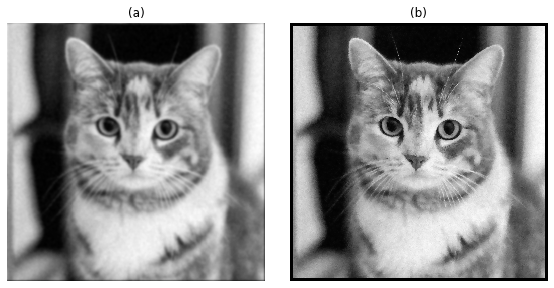

In [46]:
h = gauss_kernel(size = 11, sigma = 2)

fig, axs = plt.subplots(1, 2, figsize = (8, 4))

gauss_filtered = my_gauss_filter(img2_noisy, h)
axs[0].imshow(gauss_filtered, cmap = 'gray')
axs[0].set_title('(a)')

bilateral_filtered = my_bilateral_filter(img2_noisy, h, colour_sigma = 30)
axs[1].imshow(bilateral_filtered, cmap = 'gray')
axs[1].set_title('(b)')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.savefig('results/Task5-bilatvsgauss.png')
plt.show()

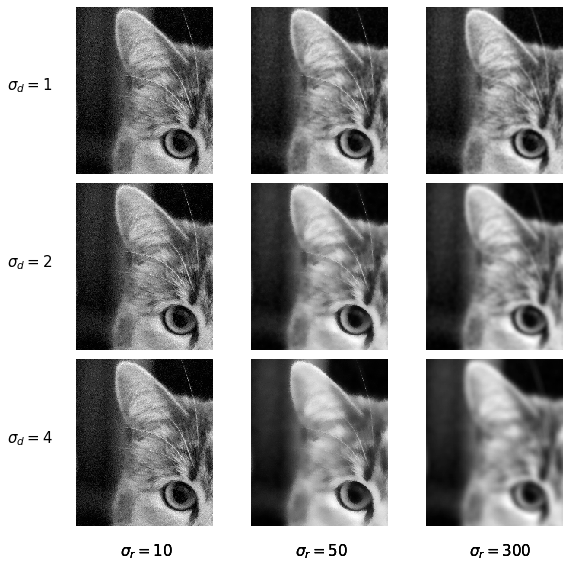

In [47]:
smallbaby = img2_noisy[20:250, 60:250]
sd_ = (1, 2, 4)
sr = (10, 50, 300)


fig, axs = plt.subplots(ncols = 4, nrows = 4, constrained_layout = True,
                        gridspec_kw = {'width_ratios': [1,4,4,4], 'height_ratios': [4, 4, 4, 1]}, 
                        figsize = (8,8))

for i in range(len(sd_)):
    sd = sd_[i]
    axs[i][0].text(0, 0.5, '$\sigma_d = {}$'.format(sd), fontsize = 15)
    h = gauss_kernel(11, sigma = sd)

    for j in range(len(sr)):
        colour_sigma = sr[j]
        out = my_bilateral_filter(smallbaby, h, colour_sigma)

        axs[i][j+1].imshow(out[5:-5,5:-5], cmap = 'gray')
        
        axs[3][j+1].text(0.35, 0.5, '$\sigma_r = {}$'.format(sr[j]), fontsize = 15)
       
    
for ax in axs.flat:
    ax.axis('off')
plt.savefig('results/Task5-bilateral.png')
plt.show()

3. Extend the Bilateral filter to colour images (eg. The color version of the previous grayscale image.). For this you may need to consider the CIE-Lab colour space as described in the paper. You will need to explore this for yourself. Namely, You need to generate the noisy color image and implement the bilateral filter to the color image (CIE-Lab). 

In [48]:
# Adding noise to colour image 

r,g,b = cv2.split(img2_resized)
noisy_colour_baby = np.zeros((512, 512, 3), dtype = np.double)

# Adding noise to each colour channel individually
r_noisy = add_noise(r)
g_noisy = add_noise(g)
b_noisy = add_noise(b)

# Reconstruct colour image
noisy_colour_baby[:,:,0] = r_noisy
noisy_colour_baby[:,:,1] = g_noisy
noisy_colour_baby[:,:,2] = b_noisy

noisy_colour_baby = noisy_colour_baby.astype(np.uint8)

In [49]:
# Extending the bilateral weight function to colour image
# we now have to calculate the Euclidean distance between two pixels

def bilateral_color_weight_function(gauss_term, f_ij, f_kl, colour_sigma):

    vector_distance = np.linalg.norm(f_ij - f_kl)
    pixel_value_diff = np.exp(-(vector_distance)**2 / (2*colour_sigma**2))

    return gauss_term*pixel_value_diff

In [50]:
def my_colour_bilateral_filter(noisy_image, gauss_kernel, colour_sigma, colour_space):
    
    ## colour space accept rgb or lab
    if colour_space.lower() == 'lab':
        f = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2Lab)
    elif colour_space.lower() == 'rgb':
        f = noisy_image
    
    kernel_size = gauss_kernel.shape[0]
    half = kernel_size//2
    
    height, width, channels = f.shape

    f = f.astype(np.double)

    output_image = np.zeros((height, width, 3), dtype = np.double)

    # there is no padding method to this filter, thus we have to limit 
    # the range of pixel we apply the filter to
    for i in range(half, height-half):
        for j in range(half, width-half):
            f_ij = f[i,j,:]
            numerator = 0
            denominator = 0
            for k in range(0, kernel_size):
                for l in range(0, kernel_size):
                    K = i-half+k
                    L = j-half+l

                    f_kl = f[K,L,:]

                    gauss_term = gauss_kernel[k,l]

                    w = bilateral_color_weight_function(gauss_term, f_ij,f_kl, colour_sigma = 60)
                    numerator += f_kl*w
                    denominator += w
            pixel = numerator/denominator
            output_image[i,j,:] = pixel
        
    if colour_space.lower() == 'lab':
        out = cv2.cvtColor(output_image.astype(np.uint8), cv2.COLOR_Lab2RGB)
        return out
    
    return output_image.astype(np.uint8)

In [51]:
# Reducing the Gaussian kernel size to reduce running time

h = gauss_kernel(7, 2)

lab = my_colour_bilateral_filter(noisy_colour_baby, h, 40, 'lab')
rgb = my_colour_bilateral_filter(noisy_colour_baby, h, 40, 'rgb')

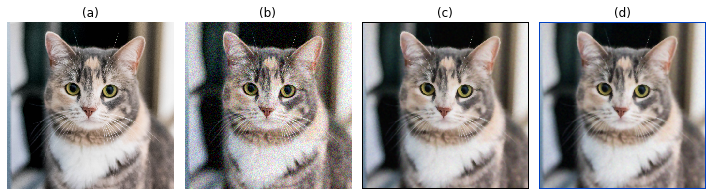

In [52]:
fig, (axs) = plt.subplots(1, 4, figsize=(10,3))
axs[0].imshow(img2_resized)
axs[0].set_title('(a)')
axs[1].imshow(noisy_colour_baby)
axs[1].set_title('(b)') 
axs[2].imshow(rgb)
axs[2].set_title('(c)')
axs[3].imshow(lab)
axs[3].set_title('(d)')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig('results/Task-5-bilateral-colours.png')
plt.show()

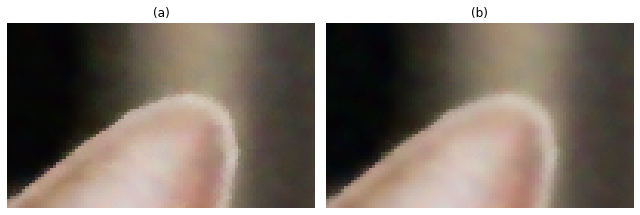

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 3))
ax1.imshow(rgb[20:80, 350:450])
ax1.set_title('(a)')
ax2.imshow(lab[20:80, 350:450])
ax2.set_title('(b)')
for ax in (ax1, ax2):
    ax.axis('off')
plt.tight_layout()
plt.savefig('results/Task-5-2-Details.png')
plt.show()

You may want to compare Gaussian smoothed colour images and bilateral filtered ones,

In [54]:
# Applying Gaussian filter to a noisy colour image is the same as follows:
# 1. Split the noisy colour image to its 3 colour channels
# 2. Apply Gaussian filter to each of the colour channel
# 3. Reconstruct the image 

def my_gauss_filter_colour(noisy_colour_image, kernel, colour_space):
    height, width, channels = noisy_colour_image.shape
    kernel_size = kernel.shape[0]
    
    half = kernel_size//2
    
    if colour_space.lower() == 'lab':
        f = cv2.cvtColor(noisy_colour_image, cv2.COLOR_RGB2Lab)
    elif colour_space.lower() == 'rgb':
        f = noisy_colour_image
    output_image = np.zeros((height, width, channels), dtype = np.double)
    
    for i in range(height):
        for j in range(width):
            C1, C2, C3 = 0, 0, 0
            #pixel = 0
            for k in range(0, kernel_size):
                for l in range(0, kernel_size):
                    try:
                        C1 += kernel[k,l]*f[i-half+k, j-half+l, 0]
                        C2 += kernel[k,l]*f[i-half+k, j-half+l, 1]
                        C3 += kernel[k,l]*f[i-half+k, j-half+l, 2]
                    except IndexError:
                        C1 += 0
                        C2 += 0
                        C3 += 0
            pixel = np.array([C1, C2, C3])        
            pixel[pixel > 255] = 255
            pixel[pixel < 0] = 0
            output_image[i,j,:] = pixel
    
    if colour_space.lower() == 'lab':
        return cv2.cvtColor(output_image.astype(np.uint8), cv2.COLOR_Lab2RGB)
    return output_image.astype(np.uint8)

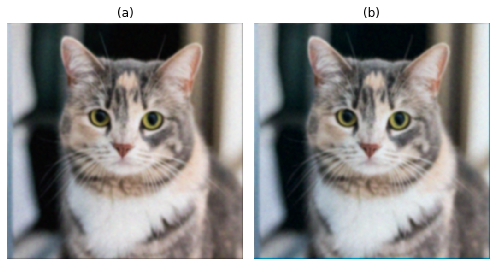

In [55]:
h = gauss_kernel(11, 2)

gauss = my_gauss_filter_colour(noisy_colour_baby, h, 'rgb')
gausslab = my_gauss_filter_colour(noisy_colour_baby, h, 'lab')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7,4))
ax1.imshow(gauss)
ax1.set_title('(a)')
ax2.imshow(gausslab)
ax2.set_title('(b)')

for ax in (ax1, ax2):
    ax.axis('off')
    
plt.tight_layout()
plt.savefig('results/Task5-Gaussian-filtered-colours.png')
plt.show()

# Task-6: Image Translation

1. Implement your own function my_translation() for image translation by any given number of pixels between [-100, +100], in both x and y. Note that this can be a real number (partial pixels). Display images translated by (2.0,4.0),(- 4.0,-6.0),(2.5, 4.5), (-0.9,1.7), (92.0,-91.0).

In [56]:
def get_neighbours(y, x, height, width):
    nb = []
    x_up = int(np.ceil(x))
    x_down = int(np.floor(x))
    
    y_up = int(np.ceil(y))
    y_down = int(np.floor(y))
    
    if x_up >= width:
        x_up = x_up - width
        
    if x_down >= width:
        x_down = x_down - width
    
    if y_up >= height:
        y_up = y_up - height
    if y_down >= height:
        y_down = y_down - height
    
    ls = [(y_up, x_up), (y_down, x_up), (y_up, x_down), (y_down, x_down)]
    for each in ls:
        if each not in nb:
            nb.append(each)
    
    return nb

In [57]:
def my_translation(f, x, y, padding):
    # assume f is a colour image, padding is for creating the canvas image. 
    
    f = f.astype(np.double)

    height, width, channels = f.shape
    canvas_height, canvas_width = height+padding, width+padding
    out = np.zeros((canvas_height, canvas_width, channels), dtype = np.double)
            
    for i in range(width):
        for j in range(height):
            if (j-y >= 0 and j-y < canvas_height) and (i+x >= 0 and i+x < canvas_width): 
            # This if statement is to ensure image do not loop around the boundaries
                if float(x).is_integer() and float(y).is_integer():
                    out[int(j-y),int(i+x),:] = f[j,i,:]
                else:
                    neighbours = get_neighbours(j-y, i+x, height, width)
                    # splatting
                    if len(neighbours) == 2:
                        splat_amount = 0.5*f[j,i,:]
                    elif len(neighbours) == 4:
                        splat_amount = 0.25*f[j,i,:]
                    for each in neighbours:
                        new_y, new_x = each
                        out[new_y, new_x, :] += splat_amount
                        out[new_y, new_x, :][out[new_y, new_x, :] > 255] = 255
  
    return out.astype(np.uint8)

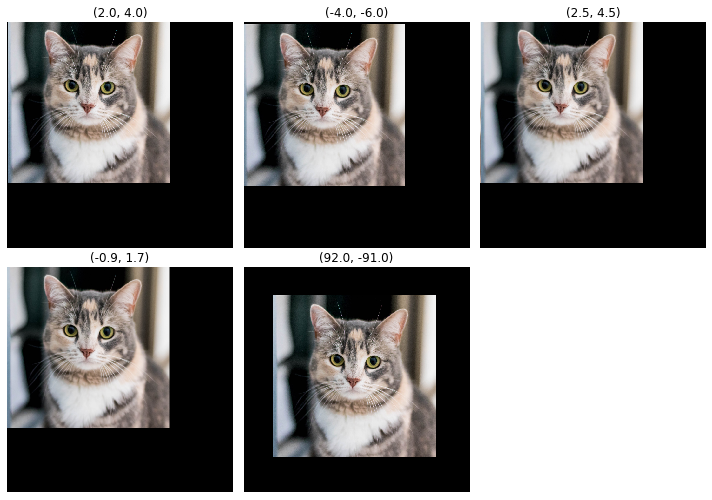

In [58]:
padding = 200

fig, axs = plt.subplots(2, 3, figsize = (10, 7))
axs[0][0].imshow(my_translation(img2_resized, 2.0, 4.0, padding))
axs[0][0].set_title('(2.0, 4.0)')
axs[0][1].imshow(my_translation(img2_resized, -4.0, -6.0, padding))
axs[0][1].set_title('(-4.0, -6.0)')

axs[0][2].imshow(my_translation(img2_resized, 2.5, 4.5, padding))
axs[0][2].set_title('(2.5, 4.5)')

axs[1][0].imshow(my_translation(img2_resized, -0.9, 1.7, padding))
axs[1][0].set_title('(-0.9, 1.7)')

axs[1][1].imshow(my_translation(img2_resized, 92.0, -91.0, padding))
axs[1][1].set_title('(92.0, -91.0)')

for ax in axs.flat:
    ax.axis('off')
    
plt.tight_layout()
plt.savefig('results/Task6-1.png')
plt.show()

### 2. Compare forward and backward mapping and analyze their difference.

In [59]:
def forward_mapping(f, transformation):
    f = f.astype(np.double)
    height, width, channels = f.shape
    # create a canvas, assume pic is colour
    canvas_height, canvas_width = height+200, width+200
    out = np.zeros((canvas_height, canvas_width, channels), dtype = np.double)
    
    for i in range(width):
        for j in range(height):
            coord = np.array([i, j])
            new_coord = transformation@coord # getting the destination coordinates
            u, v = new_coord[0], new_coord[1]
            
            if float(u).is_integer() and float(v).is_integer():
                new_y, new_x = get_neighbours(v, u, canvas_height, canvas_width)[0]
                out[new_y+440, new_x,:] = f[j,i,:] # this line is for display purpose
            else:
                splat_amount = 0.25*f[j,i,:]
                neighbours = get_neighbours(v, u, canvas_height, canvas_width)
                for each in neighbours:
                    new_y, new_x = each
                    new_y = new_y + 440 # also for display
                    out[new_y, new_x, :] += splat_amount
                    out[new_y, new_x, :][out[new_y, new_x, :] > 255] = 255
                    
    return out.astype(np.uint8)

In [60]:
R = np.array([[np.cos(45), np.sin(45)],
                [-np.sin(45), np.cos(45)]])

img = forward_mapping(img2_resized, R)

In [61]:
# The bilinear bleding function used is the formula (3.10) from the Szeliski, R. (2010) textbook.

def bilinear_interpolation(x,y, f):
    height, width, channels = f.shape
    a = x - np.floor(x)
    b = y - np.floor(y)
    x_up = int(np.ceil(x))
    x_down = int(np.floor(x))

    y_up = int(np.ceil(y))
    y_down = int(np.floor(y))


    if x_up >= width:
        x_up = x_up - width
    if x_down >= width:
        x_down = x_down - width
    
    if y_up >= height:
        y_up = y_up - height
    if y_down >= height:
        y_down = y_down - height
            
    try:
        res = (1-a)*(1-b)*f[y_down, x_down, :] + a*(1-b)*f[y_down, x_up,:] + a*b*f[y_up, x_up,:] + (1-a)*b*f[y_up, x_down, :]
    except IndexError:
        return np.zeros(3)
    
    return res

In [62]:
# This adjusted translation function helps displaying the result for backward mapping

def my_translation(f, x, y):
    f = f.astype(np.double)
    
    height, width, channels = f.shape
    out = np.zeros((height+250, width+250, channels), dtype = np.double)
            
    for i in range(width):
        for j in range(height):
            if float(x).is_integer() and float(y).is_integer():
                out[int(j-y),int(i+x),:] = f[j,i,:]
            else:
                neighbours = get_neighbours(j-y, i+x, height, width)
                if len(neighbours) == 2:
                    splat_amount = 0.5*f[j,i,:]
                elif len(neighbours) == 4:
                    splat_amount = 0.25*f[j,i,:]
                for each in neighbours:
                    new_y, new_x = each
                    out[new_y, new_x, :] += splat_amount
                    out[new_y, new_x, :][out[new_y, new_x, :] > 255] = 255
  
    return out.astype(np.uint8)

In [63]:
def backward_mapping(f, M):
    Minv = np.linalg.inv(M)
    height, width, channels = f.shape
    
    f_translated = my_translation(f, -380, -230)
    
    f = f_translated.astype(np.double)
    
    # create a canvas, assume pic is colour
    out = np.zeros((height+200, width+200, channels), dtype = np.double)
    for v in range(out.shape[0]): # height
        for u in range(out.shape[1]): # width
            x, y = Minv@np.array([u,v])
            if float(x).is_integer() and float(y).is_integer():

                out[int(v),int(u),:] = f[int(y),int(x),:]
            else:
                neighbours = get_neighbours(y, x, height, width)
                intensity_val = np.zeros(3)
                if len(neighbours) == 2:
                    for each in neighbours:
                        y_nb, x_nb = each
                        intensity_val += 0.5*f[y_nb, x_nb, :]
                elif len(neighbours) == 4:
                    intensity_val = bilinear_interpolation(x, y, f)
                    intensity_val[intensity_val > 255] = 255

                    out[v, u, :] = intensity_val
    
    return out.astype(np.uint8)

In [64]:
img_bilinear = backward_mapping(img2_resized, R)

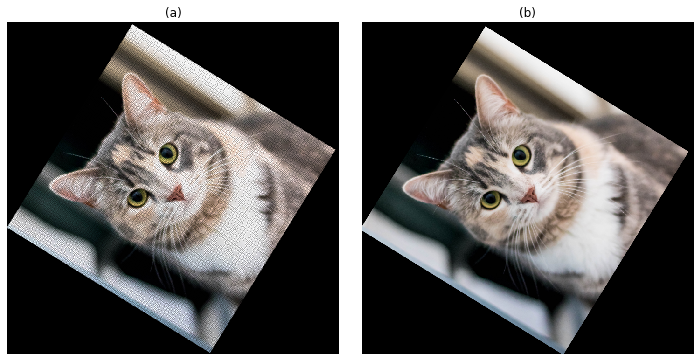

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(img)
ax1.set_title('(a)')
ax2.imshow(img_bilinear)
ax2.set_title('(b)')

for ax in (ax1, ax2):
    ax.axis('off')
    
plt.tight_layout()
plt.savefig('results/Task6-2.png')
plt.show()

### 3. Compare different interpolation methods and analyze their difference 

In [66]:
# Scaling the image using inbuit function, interpolation methods include bilinear and nearest neighbour

scaleLinear = cv2.resize(img2_resized, None, fx = 10, fy = 10, 
                          interpolation = cv2.INTER_LINEAR)

scaleNN = cv2.resize(img2_resized, None, fx = 10, fy = 10, 
                          interpolation = cv2.INTER_NEAREST)

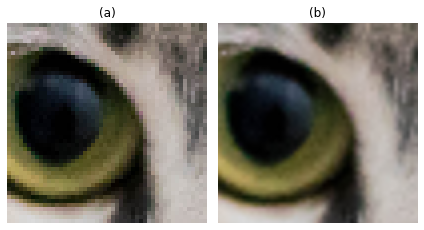

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(scaleNN[1800:2300, 1900:2400])
ax1.set_title('(a)')
ax2.imshow(scaleLinear[1800:2300, 1900:2400])
ax2.set_title('(b)')

for ax in (ax1, ax2):
    ax.axis('off')
    
plt.tight_layout()
plt.savefig('results/Task6-3.png')
plt.show()